In [21]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [22]:
data = pd.read_csv("parkinsons_updrs.data.csv")

In [23]:
data.drop(["motor_UPDRS"], axis=1, inplace=True)

In [24]:
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [25]:
from sklearn.model_selection import train_test_split 

#Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#finding optimal n value
knn2 = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(2, 25)} #define the n_neighbors to test
knn_gscv = GridSearchCV(knn2, param_grid, cv=5) #testing values for n_neighbors
knn_gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])})

In [27]:
#print the best n 
knn_gscv.best_params_

{'n_neighbors': 2}

In [28]:
neigh = KNeighborsRegressor(n_neighbors=2) # vary neighbors
neigh.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [29]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from math import sqrt  # For squareroot operation
from sklearn.metrics import mean_squared_error  # For MSE
from sklearn.metrics import r2_score  # For find accuracy with R2 Score

y_pred_kNN_train = neigh.predict(x_train)
y_pred_kNN_test = neigh.predict(x_test)

r2_kNN_train = r2_score(y_train, y_pred_kNN_train)
print("Training R^2 for k Nearest Neighbour Model: ", r2_kNN_train*100)

r2_kNN_test = r2_score(y_test, y_pred_kNN_test)
print("Testing R^2 for k Nearest Neighbour Model: ", r2_kNN_test*100)

RMSE_kNN_train = sqrt(mean_squared_error(y_train, y_pred_kNN_train))
print("RMSE for Training Data: ", RMSE_kNN_train)

RMSE_kNN_test = sqrt(mean_squared_error(y_test, y_pred_kNN_test))
print("RMSE for Testing Data: ", RMSE_kNN_test)

Training R^2 for k Nearest Neighbour Model:  99.17421579214071
Testing R^2 for k Nearest Neighbour Model:  96.52911459464542
RMSE for Training Data:  0.9655167197492882
RMSE for Testing Data:  2.0477736180643666


In [30]:
true_value = y_train
predicted_value = y_pred_kNN_train

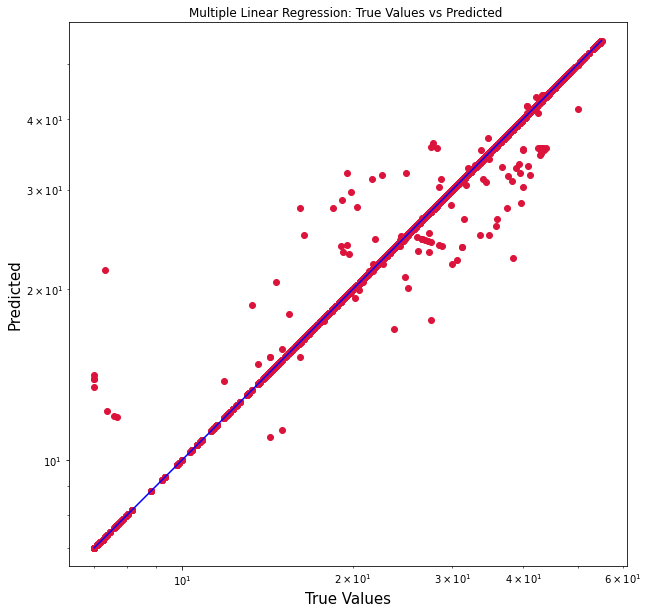

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("k Nearest Neighbour: True Values vs Predicted ")
plt.axis('equal')
plt.show()